In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Final project/secondary_data_no_miss.csv', sep = ";")

In [ ]:
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [ ]:
data['class'].replace({'p':0,'e':1},inplace = True)

# **EXPLORATORY DATA ANALYSIS**

## COUNTING VALUES IN EACH COLUMN

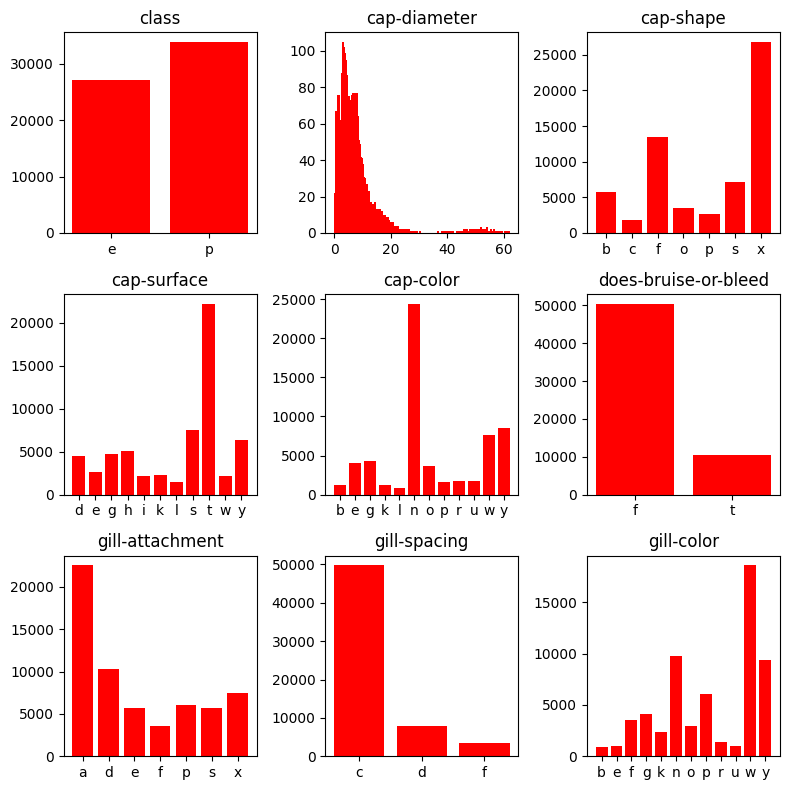

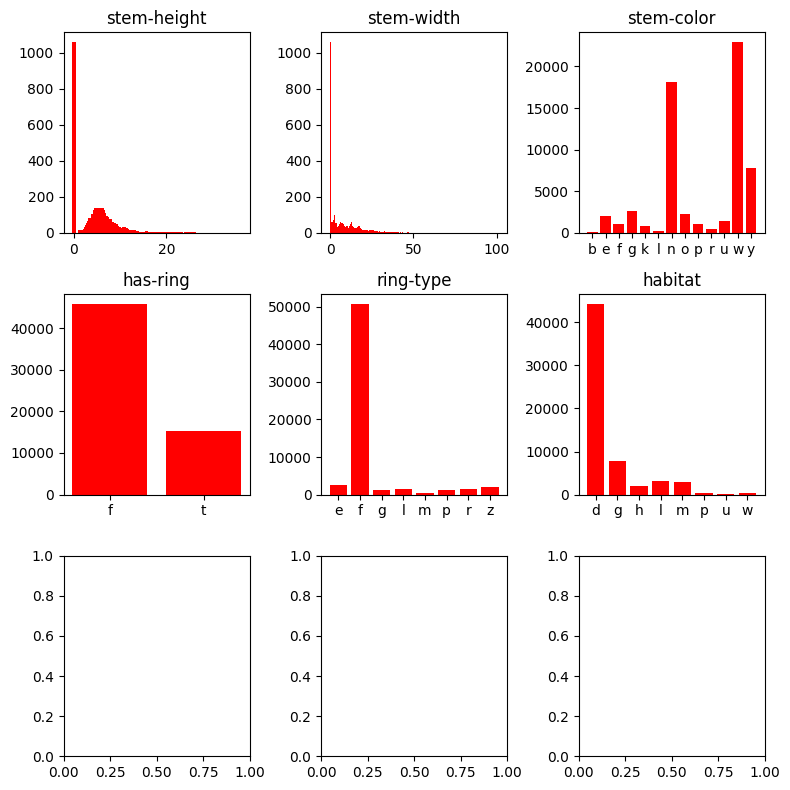

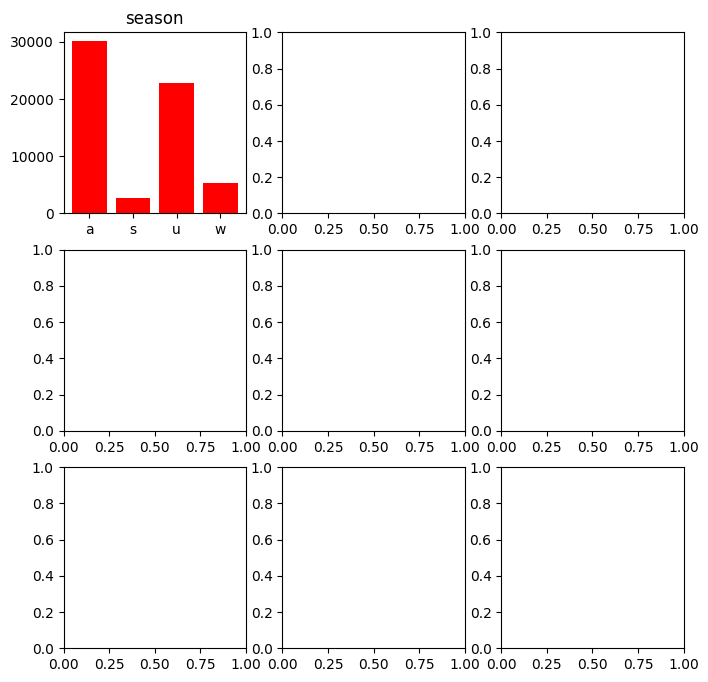

In [ ]:
rindex, colindex = 0, 0
for col in df.columns:
  if rindex == 0 and colindex == 0:
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
  countings = df.groupby(col).apply(len)
  countings = pd.DataFrame(countings)
  countings.reset_index(inplace=True)
  countings.columns=[col, "count"]
  axes[rindex, colindex].bar(countings[col], countings["count"], color="red")
  axes[rindex, colindex].title.set_text(col)
  if colindex == 2:
    rindex += 1
    colindex = 0
  else: colindex += 1
  if rindex == 3 or col == "habitat":
    fig.tight_layout()
    plt.show()
    rindex, colindex = 0, 0

## DISTRIBUTION OF EDIBLE AND POISONOUS MUSHROOMS OVER VARIOUS FEATURES

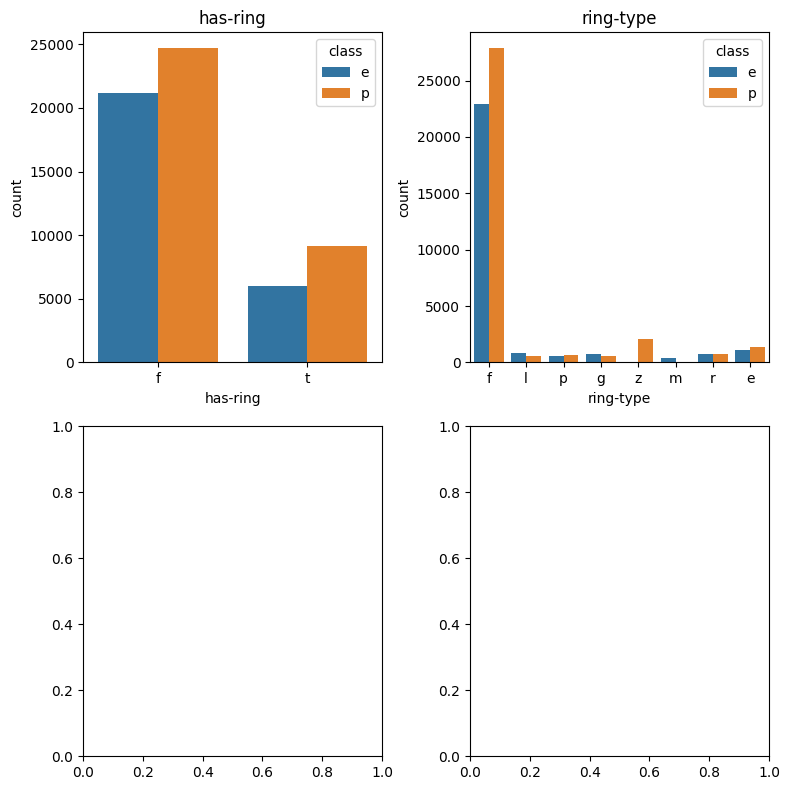

In [ ]:
rindex, colindex = 0, 0
for col in ["gill-spacing", "gill-color"]:
  if rindex == 0 and colindex == 0:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
  sns.countplot(ax = axes[rindex, colindex], data=df, x=col, hue="class")
  axes[rindex, colindex].title.set_text(col)
  # if colindex == 1:
  #   rindex += 1
  #   colindex = 0

  colindex += 1
  if colindex == 2:
    fig.tight_layout()
    plt.show()
    rindex, colindex = 0, 0

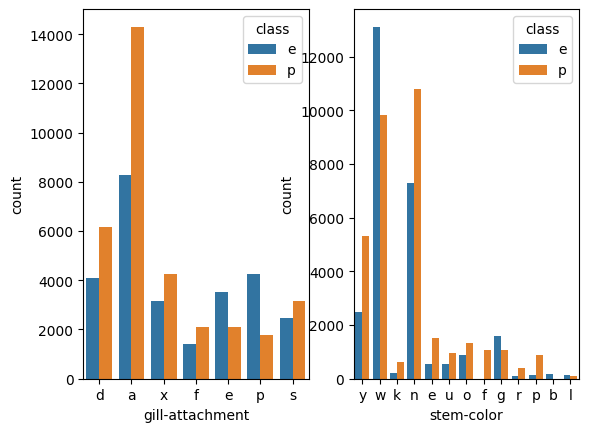

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.countplot(ax = ax1, data=df, x="gill-attachment", hue="class")
# ax1.title.set_text("gill-spacing")
sns.countplot(ax = ax2, data=df, x="stem-color", hue="class")
# ax1.title.set_text("gill-color")
plt.show()

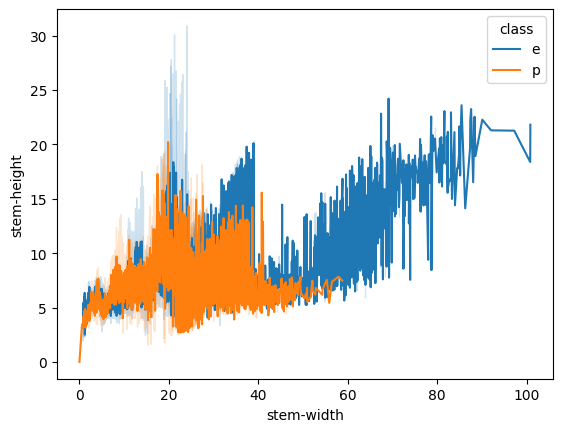

In [ ]:
sns.lineplot(data=df, x="stem-width", y="stem-height", hue="class")
plt.show()

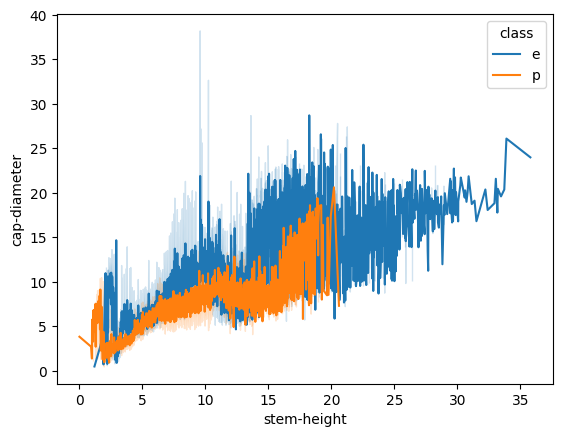

In [ ]:
sns.lineplot(data=df, x="stem-height", y="cap-diameter", hue="class")
plt.show()

<ipython-input-11-9c81afdf135e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


Text(0.5, 1.0, 'Correlation Between Features')

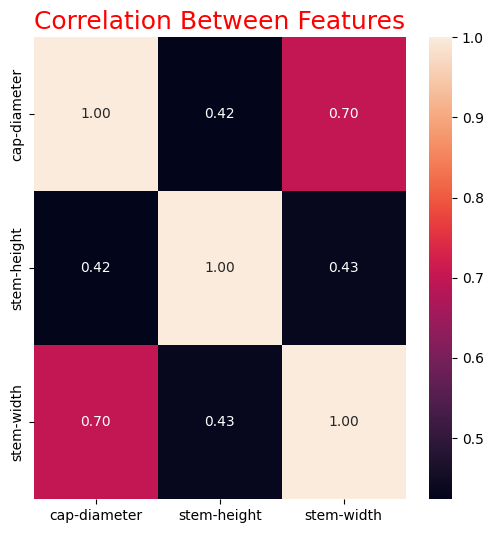

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Between Features", fontsize=18, color="red")

# **DATA PREPROCESSING**

In [ ]:
LE = LabelEncoder()
for col in data.drop(["cap-diameter","stem-height","stem-width","class"],axis=1).columns:
    data[col] = LE.fit_transform(data[col])

data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,6,2,6,0,2,3,10,16.95,...,4,7,11,0,4,1,2,7,0,3
1,0,16.60,6,2,6,0,2,3,10,17.99,...,4,7,11,0,4,1,2,7,0,2
2,0,14.07,6,2,6,0,2,3,10,17.80,...,4,7,11,0,4,1,2,7,0,3
3,0,14.17,2,3,1,0,2,3,10,15.77,...,4,7,11,0,4,1,5,7,0,3
4,0,14.64,6,3,6,0,2,3,10,16.53,...,4,7,11,0,4,1,5,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,1.18,5,7,11,0,3,2,2,3.93,...,5,8,12,1,6,0,1,7,0,0
61065,0,1.27,2,7,11,0,3,2,2,3.18,...,5,8,12,1,6,0,1,7,0,0
61066,0,1.27,5,7,11,0,3,2,2,3.86,...,5,8,12,1,6,0,1,7,0,2
61067,0,1.24,2,7,11,0,3,2,2,3.56,...,5,8,12,1,6,0,1,7,0,2


In [ ]:
for col in ["cap-diameter","stem-height","stem-width"]:
  standard_scaler = StandardScaler()
  data[col] = standard_scaler.fit_transform(data.loc[:,[col]])

In [ ]:
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,1.619462,6,2,6,0,2,3,10,3.076705,...,4,7,11,0,4,1,2,7,0,3
1,0,1.873982,6,2,6,0,2,3,10,3.385311,...,4,7,11,0,4,1,2,7,0,2
2,0,1.393432,6,2,6,0,2,3,10,3.328931,...,4,7,11,0,4,1,2,7,0,3
3,0,1.412426,2,3,1,0,2,3,10,2.726555,...,4,7,11,0,4,1,5,7,0,3
4,0,1.501699,6,3,6,0,2,3,10,2.952075,...,4,7,11,0,4,1,5,7,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,-1.054903,5,7,11,0,3,2,2,-0.786809,...,5,8,12,1,6,0,1,7,0,0
61065,0,-1.037808,2,7,11,0,3,2,2,-1.009362,...,5,8,12,1,6,0,1,7,0,0
61066,0,-1.037808,5,7,11,0,3,2,2,-0.807581,...,5,8,12,1,6,0,1,7,0,2
61067,0,-1.043506,2,7,11,0,3,2,2,-0.896602,...,5,8,12,1,6,0,1,7,0,2


In [ ]:
y = data["class"]

In [ ]:
X = data.drop(["class"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
11067,-0.872560,6,2,1,0,0,3,7,-0.341704,-0.998360,5,8,11,1,6,0,1,7,0,2
48406,2.776201,6,9,5,0,4,3,11,3.978785,7.171333,5,8,6,1,6,0,1,7,0,2
38752,0.637469,6,11,5,1,6,3,9,0.833374,0.944670,4,8,6,1,3,0,1,7,0,0
3449,1.302261,6,10,5,1,2,3,10,0.854146,0.408593,5,8,11,1,6,1,8,7,0,0
14139,-0.091904,6,3,2,0,0,1,5,-0.190368,-0.741282,5,6,3,1,6,1,3,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60620,-0.395809,4,11,5,0,3,2,2,-0.567224,0.722467,5,8,6,1,6,0,1,7,3,1
56373,0.263285,3,5,6,0,7,0,11,-1.436663,0.374715,5,8,6,1,6,0,1,7,0,3
34086,0.052451,6,9,7,0,5,0,7,-0.614702,-0.309830,5,8,8,1,6,0,1,7,0,0
58067,-0.680720,3,6,2,0,3,2,2,-1.952985,-1.210598,2,0,2,1,6,0,1,7,0,2


In [ ]:
y_train

11067    0
48406    1
38752    0
3449     1
14139    1
        ..
60620    1
56373    0
34086    0
58067    0
27439    0
Name: class, Length: 48855, dtype: int64

# **SUPPORT VECTOR MACHINES**

In [ ]:
svm_model = SVC(kernel='linear')

In [ ]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_model.predict(X_test)

## Experiment

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6600622236777468


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[5202 1599]
 [2553 2860]]


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, pos_label=1)
print("Precision:", precision)

Precision: 0.641399416909621


In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, pos_label=1)
print("Recall:", recall)

Recall: 0.5283576574912249


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, pos_label=1)
print("F1-score:", f1)

F1-score: 0.5794165316045381


In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

In [ ]:
svm = SVC(kernel='linear')

In [ ]:
grid_search = GridSearchCV(svm, param_grid, cv=2)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
best_params = grid_search.best_params_
print("Siêu tham số tốt nhất:", best_params)

Siêu tham số tốt nhất: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(f"Accuracy score after using GridSearchCV is: {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy score after using GridSearchCV is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6801
           1       1.00      1.00      1.00      5413

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



# **K NEAREST NEIGHBORS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy score using Random Forest is: {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

[[6748   16]
 [  20 5430]]
Accuracy score using Random Forest is: 0.9970525626330441
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6764
           1       1.00      1.00      1.00      5450

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [ ]:
scaler = StandardScaler()

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
operations = [('scaler', scaler), ('knn', knn)]

In [ ]:
k_values = list(range(1,30))

In [ ]:
param_grid = {'knn__n_neighbors': k_values}

In [ ]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring = 'accuracy')

In [ ]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.99969297, 0.99930406, 0.99899703, 0.99877188, 0.99823969,
       0.99776891, 0.99740047, 0.99676594, 0.99621328, 0.99584485,
       0.99539453, 0.9950261 , 0.99402313, 0.99357282, 0.99277454,
       0.99244704, 0.99183298, 0.99148501, 0.99083001, 0.99035923,
       0.98976563, 0.98919251, 0.9884761 , 0.98757548, 0.98628595,
       0.98548767, 0.98462798, 0.98413673, 0.98278579])

In [ ]:
best_model = full_cv_classifier.best_estimator_
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

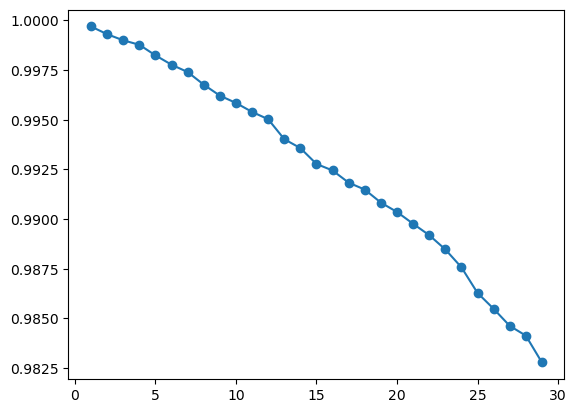

In [ ]:
plt.plot(k_values, full_cv_classifier.cv_results_['mean_test_score'],"-o")

In [ ]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[6764,    0],
       [   3, 5447]], dtype=int64)

In [ ]:
print(f"Accuracy score using Random Forest is: {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy score using Random Forest is: 0.9997543802194203
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6764
           1       1.00      1.00      1.00      5450

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



# **DECISION TREE**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import time

## Train-test split

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
# scaler = StandardScaler()
# operations = [('scaler', scaler), ('dt', dt_model)]
# pipe = Pipeline(operations)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt_model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test, digits=3))

0.9963975765514983
              precision    recall  f1-score   support

           0      0.997     0.997     0.997      6774
           1      0.996     0.996     0.996      5440

    accuracy                          0.996     12214
   macro avg      0.996     0.996     0.996     12214
weighted avg      0.996     0.996     0.996     12214



In [ ]:
print("Decision Tree's accuracy: ", accuracy_score(y_test, y_pred))
print("Decision Tree's precision: ", precision_score(y_test, y_pred))
print("Decision Tree's recall: ", recall_score(y_test, y_pred))
print("Decision Tree's F1 score: ", f1_score(y_test, y_pred))
print("Decision Tree's roc_auc score: ", roc_auc_score(y_test, y_pred))

Decision Tree's accuracy:  0.9963975765514983
Decision Tree's precision:  0.9959558823529412
Decision Tree's recall:  0.9959558823529412
Decision Tree's F1 score:  0.9959558823529412
Decision Tree's roc_auc score:  0.9963540852567777


## Grid Search Cross Validation

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dt_model = DecisionTreeClassifier()

In [ ]:
# scaler = StandardScaler()
# operations = [('scaler', scaler), ('dt', dt_model)]
# pipe = Pipeline(operations)

In [ ]:
param_grid_2 = {'max_depth': [None] + list(np.arange(3,10)),
              'min_samples_split': np.arange(2, 10, 1),
              'min_samples_leaf':np.arange(1, 10, 1),
              'max_leaf_nodes' : [None, 8, 16, 32],
              'criterion': ('gini', 'entropy', 'log_loss'),
              # 'ccp_alpha': [0, 0.1, .01, .001]
}

In [ ]:
dt_grid = GridSearchCV(dt_model, param_grid_2, cv=6, scoring="accuracy", return_train_score=True, verbose=4)
start = time.time()
dt_grid.fit(X_train, y_train)
end = time.time()

Streaming output truncated to the last 5000 lines.
[CV 5/6] END criterion=log_loss, max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=8;, score=(train=0.806, test=0.812) total time=   0.2s
[CV 6/6] END criterion=log_loss, max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=8;, score=(train=0.807, test=0.803) total time=   0.1s
[CV 1/6] END criterion=log_loss, max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=9;, score=(train=0.743, test=0.738) total time=   0.1s
[CV 2/6] END criterion=log_loss, max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=9;, score=(train=0.751, test=0.757) total time=   0.1s
[CV 3/6] END criterion=log_loss, max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=9;, score=(train=0.729, test=0.729) total time=   0.1s
[CV 4/6] END criterion=log_loss, max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=9;, score=(train=0.808, test=0.803) total ti

In [ ]:
print(dt_grid.best_score_)
print(dt_grid.best_params_)
print(dt_grid.best_estimator_)
print(end - start)

0.9961314356528007
{'criterion': 'log_loss', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
DecisionTreeClassifier(criterion='log_loss', min_samples_split=3)
5449.110018014908


In [ ]:
y_pred = dt_grid.predict(X_test)

In [ ]:
print("Decision Tree's accuracy: ", accuracy_score(y_test, y_pred))
print("Decision Tree's precision: ", precision_score(y_test, y_pred))
print("Decision Tree's recall: ", recall_score(y_test, y_pred))
print("Decision Tree's F1 score: ", f1_score(y_test, y_pred))

Decision Tree's accuracy:  0.996643196332078
Decision Tree's precision:  0.9965054257862792
Decision Tree's recall:  0.9959558823529412
Decision Tree's F1 score:  0.9962305782844534


In [ ]:
print("Decision Tree's scores after tuning\n", classification_report(y_pred, y_test, digits=3))

Decision Tree's scores after tuning
               precision    recall  f1-score   support

           0      0.997     0.997     0.997      6777
           1      0.996     0.997     0.996      5437

    accuracy                          0.997     12214
   macro avg      0.997     0.997     0.997     12214
weighted avg      0.997     0.997     0.997     12214



# **RANDOM FOREST**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_pred,y_test))
print(f"Accuracy score using Random Forest is: {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

[[6700    1]
 [   0 5513]]
Accuracy score using Random Forest is: 0.9999181267398067
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6700
           1       1.00      1.00      1.00      5514

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



In [ ]:
scaler = StandardScaler()
rfc = RandomForestClassifier()
operations = [('scaler', scaler), ('rfc', rfc)]
pipe = Pipeline(operations)

In [ ]:
min_samples_split = [3,5,7,9,11,15]
n_estimators = [20,50,100,150,200,300]
max_depth = [None, 5, 10]
param_grid = {'rfc__min_samples_split':min_samples_split,
              'rfc__n_estimators':n_estimators,
              'rfc__max_depth' : max_depth}
grid  = GridSearchCV(pipe,param_grid,cv =5, scoring ='accuracy',return_train_score =True,verbose =2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=20; total time=   0.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=20; total time=   0.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=20; total time=   0.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=20; total time=   0.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=20; total time=   0.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=50; total time=   1.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=50; total time=   1.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=50; total time=   1.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_estimators=50; total time=   1.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=3, rfc__n_e

[CV] END rfc__max_depth=None, rfc__min_samples_split=7, rfc__n_estimators=200; total time=   6.4s
[CV] END rfc__max_depth=None, rfc__min_samples_split=7, rfc__n_estimators=300; total time=   9.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=7, rfc__n_estimators=300; total time=   9.4s
[CV] END rfc__max_depth=None, rfc__min_samples_split=7, rfc__n_estimators=300; total time=   9.6s
[CV] END rfc__max_depth=None, rfc__min_samples_split=7, rfc__n_estimators=300; total time=   9.6s
[CV] END rfc__max_depth=None, rfc__min_samples_split=7, rfc__n_estimators=300; total time=   9.7s
[CV] END rfc__max_depth=None, rfc__min_samples_split=9, rfc__n_estimators=20; total time=   0.6s
[CV] END rfc__max_depth=None, rfc__min_samples_split=9, rfc__n_estimators=20; total time=   0.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=9, rfc__n_estimators=20; total time=   0.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=9, rfc__n_estimators=20; total time=   0.5s
[CV] END rfc__max_depth=

[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=150; total time=   4.6s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=150; total time=   4.5s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=200; total time=   6.2s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=200; total time=   6.2s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=200; total time=   6.3s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=200; total time=   6.3s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=200; total time=   6.3s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=300; total time=   9.4s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=300; total time=   9.7s
[CV] END rfc__max_depth=None, rfc__min_samples_split=15, rfc__n_estimators=300; total time=   9.6s
[CV] END r

[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=150; total time=   2.4s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=150; total time=   2.3s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=150; total time=   2.2s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=150; total time=   2.3s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=150; total time=   2.3s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=200; total time=   2.9s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=200; total time=   2.9s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=200; total time=   3.0s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=200; total time=   3.1s
[CV] END rfc__max_depth=5, rfc__min_samples_split=7, rfc__n_estimators=200; total time=   2.9s
[CV] END rfc__max_depth=5, rfc__min_samples_split=

[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=100; total time=   1.5s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=100; total time=   1.5s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=100; total time=   1.6s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=150; total time=   2.4s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=150; total time=   2.4s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=150; total time=   2.4s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=150; total time=   2.3s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=150; total time=   2.4s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=200; total time=   3.2s
[CV] END rfc__max_depth=5, rfc__min_samples_split=15, rfc__n_estimators=200; total time=   3.1s
[CV] END rfc__max_depth=5, rfc__min_samp

[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=50; total time=   1.3s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=50; total time=   1.2s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=100; total time=   2.7s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=100; total time=   2.6s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=100; total time=   2.6s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=100; total time=   2.6s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=100; total time=   2.7s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=150; total time=   4.0s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=150; total time=   4.2s
[CV] END rfc__max_depth=10, rfc__min_samples_split=7, rfc__n_estimators=150; total time=   3.9s
[CV] END rfc__max_depth=10, rfc__min_sampl

[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=20; total time=   0.4s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=50; total time=   1.3s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=50; total time=   1.2s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=50; total time=   1.3s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=50; total time=   1.2s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=50; total time=   1.3s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=100; total time=   2.4s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=100; total time=   2.3s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=100; total time=   2.4s
[CV] END rfc__max_depth=10, rfc__min_samples_split=15, rfc__n_estimators=100; total time=   2.6s
[CV] END rfc__max_depth=10, rfc__min

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__max_depth': [None, 5, 10],
                         'rfc__min_samples_split': [3, 5, 7, 9, 11, 15],
                         'rfc__n_estimators': [20, 50, 100, 150, 200, 300]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfc', RandomForestClassifier(min_samples_split=3))])

In [ ]:
model_rfc = grid.best_estimator_

In [ ]:
model_rfc.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfc', RandomForestClassifier(min_samples_split=3))])

In [ ]:
y_pred = model_rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_pred,y_test))

[[6700    2]
 [   0 5512]]


In [ ]:
print(f"Accuracy score using Random Forest is: {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy score using Random Forest is: 0.9998362534796136
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6700
           1       1.00      1.00      1.00      5514

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

